In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud
import re

In [2]:
df = pd.read_csv(r'C:\Users\Luciano\Desktop\Práctica Crehana PowerBI\supermarket_sales - Sheet1.csv')
df_virgin = pd.read_csv(r'C:\Users\Luciano\Desktop\Práctica Crehana PowerBI\supermarket_sales - Sheet1.csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.drop(['cogs','Tax 5%','gross margin percentage','gross income'],axis=1,inplace=True)
#Retiramos columnas que no me sirven para la práctica

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


##### Nuestro dataframe contiene 1000 registros cuyas variables numéricas se distribuyen de la siguiente manera:

In [6]:
df.describe()

,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,6.97270
std,26.494628,2.923431,245.885335,1.71858
min,10.080000,1.000000,10.678500,4.00000
25%,32.875000,3.000000,124.422375,5.50000
50%,55.230000,5.000000,253.848000,7.00000
75%,77.935000,8.000000,471.350250,8.50000
max,99.960000,10.000000,1042.650000,10.00000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
df['MonthYearDay'] = pd.to_datetime(df[['Month','Year']].assign(DAY=1))

In [10]:
df['Time'] = df['Time'].str.extract(r"(^\d\d)",expand=False)

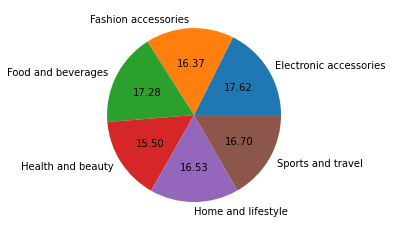

In [11]:
pieGroup = df.groupby(by="Product line").sum()
plt.pie(pieGroup['Quantity'],labels=pieGroup.index,autopct='%.2f')
plt.show()

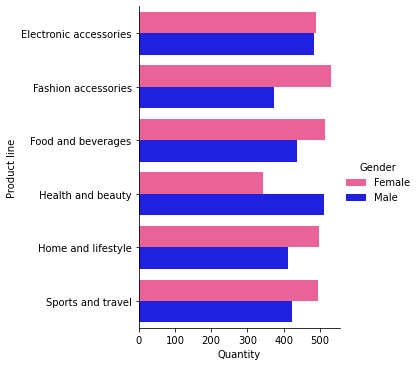

In [12]:
barPlot = df.groupby(by=["Product line","Gender"],as_index=False).sum()
sns.catplot(y="Product line",x='Quantity',hue="Gender",data=barPlot,kind="bar",palette={"Male":"blue","Female":"#ff4d94"})

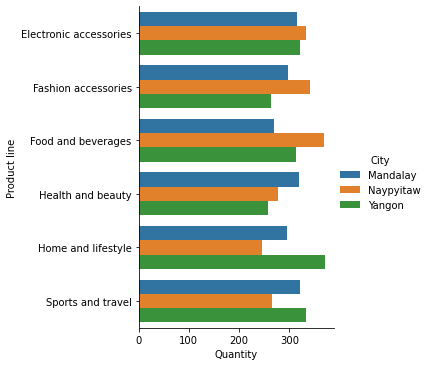

In [13]:
barPlot = df.groupby(by=["Product line","City"],as_index=False).sum()
sns.catplot(y="Product line",x='Quantity',hue="City",data=barPlot,kind="bar")

<AxesSubplot:ylabel='Gender'>

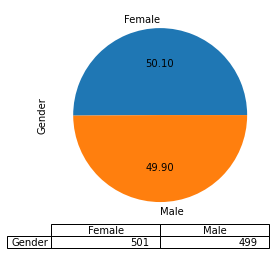

In [79]:
seriesGender = df['Gender'].value_counts()
#ss = df.groupby(by='Gender').size() ! idem lo de arriba pero usando groupby !
seriesGender.plot.pie(table=True,autopct='%.2f')

In [111]:
groupSpending = df.groupby(by="Gender").sum()
qtyMale = groupSpending.loc[["Male"],"Quantity"]
qtyFemale = groupSpending.loc[["Female"],"Quantity"]
unitpMale = groupSpending.loc[["Male"],"Unit price"]
unitpFemale = groupSpending.loc[["Female"],"Unit price"]

print("Las mujeres gastaron en total:","$",int(qtyFemale[0]*unitpFemale[0]))
print("Los hombres gastaron en total:","$",int(qtyMale[0]*unitpMale[0]))

Las mujeres gastaron en total: $ 79434691
Los hombres gastaron en total: $ 73908094


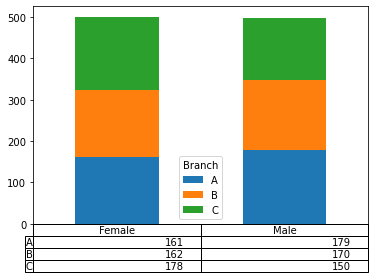

In [296]:
df_plot = df.groupby(['Gender', 'Branch']).size().reset_index().pivot(columns='Branch', index='Gender', values=0)
stackedBarPlot = df_plot.plot.bar(stacked=True,table=True).get_xaxis().set_visible(False)

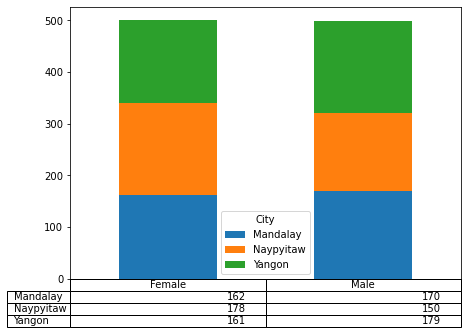

In [303]:
df_plot2 = df.groupby(['Gender', 'City']).size().reset_index().pivot(columns='City', index='Gender', values=0)
stackedBarPlot = df_plot2.plot.bar(stacked=True,table=True,figsize=(7,5)).get_xaxis().set_visible(False)

In [391]:
df_lineplot = df.groupby(['Time', 'Product line']).size().reset_index().pivot(columns='Product line', index='Time', values=0)
#df_lineplot = df.groupby(['Time', 'Product line']).sum()#.pivot(columns='Product line', index='Time', values=0)
df_lineplot


#df_lineplot.plot.line()

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Time,,,,,,
10,17,14,20,17,18,15
11,18,14,11,10,21,16
12,16,19,10,14,14,16
13,13,19,15,17,20,19
14,14,15,12,19,9,14
15,15,18,21,12,19,17
16,11,12,16,10,8,20
17,14,13,6,11,17,13
18,20,19,17,14,11,12
